In [1]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from random import randrange

In [2]:
# Images will be 200x200 jpgs of 8,144 cars
rows = 200
cols = 200

# Get file paths before looping through and reading them all into vectors
img_files = glob.glob('cars_train/*.jpg')
num_images = len(img_files)
imgs = np.zeros((rows * cols, num_images), dtype='uint8')

In [3]:
# Grayscale and resize each image
for i, img in enumerate(img_files):
    imgs[:, i] = np.reshape(Image.open(img, 'r').convert('L').resize((200, 200), Image.LANCZOS), (1, -1), order='F')

Text(0.5, 0.98, '6 Randomly Chosen Images from Dataset')

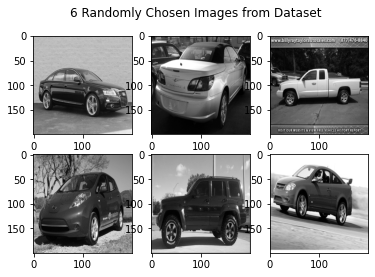

In [4]:
fig, axes = plt.subplots(2, 3)
for i in range(2):
    for j in range(3):
        # Plot 6 random images
        axes[i, j].imshow(np.reshape(imgs[:, randrange(num_images)], (rows, -1), order='F'), cmap='gray')
fig.suptitle('6 Randomly Chosen Images from Dataset')

In [5]:
fig.savefig('6_rand_imgs.jpg')

In [6]:
# calculate the average vector and print it out
avg_car = np.sum(imgs, axis=1) / num_images
avg_car.astype(np.uint8)

array([144, 144, 143, ..., 128, 128, 128], dtype=uint8)

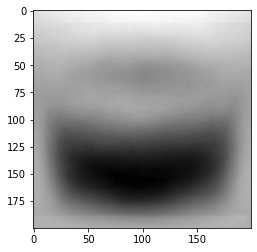

In [7]:
plt.imshow(np.reshape(avg_car, (rows, -1), order='F'), cmap='gray')

In [8]:
plt.imsave('avg_car.jpg', np.reshape(avg_car, (rows, -1), order='F'), cmap='gray')

In [9]:
# cast all to uint16 and subtract each image vector from the average before taking the outer product
A = np.zeros((rows * cols, num_images), dtype=np.uint16)
for i in range(num_images):
    A[:, i] = imgs[:, i].astype(np.uint16) - avg_car.astype(np.uint16)
    A[:, i][A[:, i] < 0] = 0
A.astype(np.uint8)     

array([[220,  29,  96, ..., 235, 222, 181],
       [210,  33,  94, ..., 233, 224, 176],
       [209,  37,  94, ..., 234, 205, 176],
       ...,
       [224,  10, 202, ...,  49, 222, 197],
       [208,  25, 214, ...,  50, 217, 197],
       [193,  11, 202, ...,  47, 226, 197]], dtype=uint8)

In [10]:
A_copy = A.copy()

Text(0.5, 0.98, '6 Randomly Chosen Centered Images from $A$')

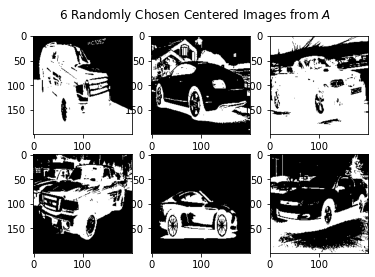

In [11]:
fig, axes = plt.subplots(2, 3)
for i in range(2):
    for j in range(3):
        axes[i, j].imshow(np.reshape(A[:, randrange(num_images)], (rows, -1), order='F'), cmap='gray')
fig.suptitle(r'6 Randomly Chosen Centered Images from $A$')

In [12]:
fig.savefig('6_rand_centered_imgs.jpg')

In [13]:
# covariance matrix
S = A.T.astype(np.float32) @ A.astype(np.float32)
# D is eigenvalues, V is eigenvectors
D, V = np.linalg.eig(S)
# sort D, and then sort V the same way to get the eigenvectors in descending order
order = D.argsort()[::-1]
V = V[:, order].astype(np.float32)

# normalize U for output
U = A.astype(np.float32) @ V
squares = np.square(U)
denom = np.sqrt(np.sum(squares, axis=0))
for i in range(num_images):
    U[:, i] = U[:, i] / denom[i]

Text(0.5, 0.98, '6 Largest Eigenvectors from $U$')

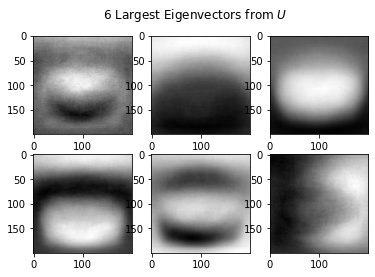

In [14]:
fig, axes = plt.subplots(2, 3)
count = 0
for i in range(2):
    for j in range(3):
        axes[i, j].imshow(np.reshape(U[:, count], (rows, -1), order='F'), cmap='gray')
        count += 1
fig.suptitle(r'6 Largest Eigenvectors from $U$')

In [15]:
fig.savefig('6_largest_eig_vecs.jpg')

Text(0.5, 0.98, 'Original Image vs. Top-9 Eigenvector Reconstruction')

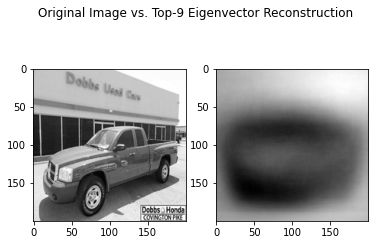

In [16]:
# Calculate and plot the top-n_eig eigenvector reconstruction
try_reconst = 50
n_eig = 9
omegas = U[:, 0:n_eig].T @ ((imgs[:, try_reconst].astype(float)) - avg_car)
res = U[:, 0:n_eig] @ omegas + avg_car.astype(float)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.reshape(imgs[:, try_reconst], (rows, -1), order='F'), cmap='gray')
axes[1].imshow(np.reshape(res, (rows, -1), order='F'), cmap='gray')
fig.suptitle(f'Original Image vs. Top-{n_eig} Eigenvector Reconstruction')

In [17]:
fig.savefig('top9_reconstruction.jpg')

Text(0.5, 0.98, 'Original Image vs. Top-200 Eigenvector Reconstruction')

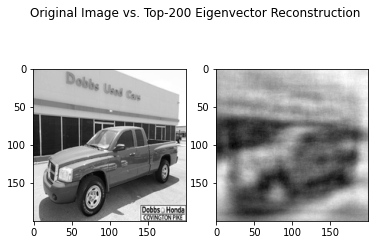

In [25]:
# Calculate and plot the top-n_eig eigenvector reconstruction
try_reconst = 50
n_eig = 200
omegas = U[:, 0:n_eig].T @ ((imgs[:, try_reconst].astype(float)) - avg_car)
res = U[:, 0:n_eig] @ omegas + avg_car.astype(float)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.reshape(imgs[:, try_reconst], (rows, -1), order='F'), cmap='gray')
axes[1].imshow(np.reshape(res, (rows, -1), order='F'), cmap='gray')
fig.suptitle(f'Original Image vs. Top-{n_eig} Eigenvector Reconstruction')

In [26]:
fig.savefig('top200_reconstruction.jpg')

Text(0, 0.5, 'Eigenvalue')

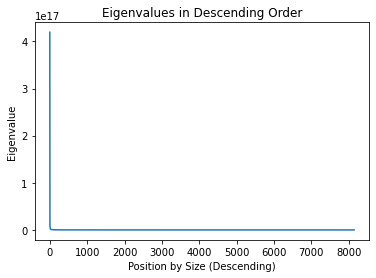

In [20]:
fig = plt.figure()
plt.plot(D)
plt.title('Eigenvalues in Descending Order')
plt.xlabel('Position by Size (Descending)')
plt.ylabel('Eigenvalue')

In [21]:
fig.savefig('descending_eig_vals.jpg')

Text(0, 0.5, 'Distortion')

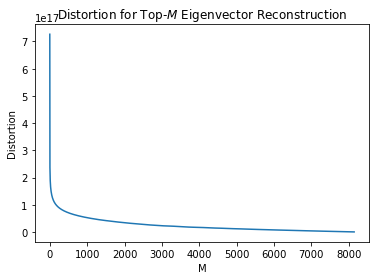

In [22]:
distortion = [sum(D[i:]) for i in range(len(D))]
    
fig = plt.figure()
plt.plot(distortion)
plt.title(r'Distortion for Top-$M$ Eigenvector Reconstruction')
plt.xlabel('M')
plt.ylabel('Distortion')

In [23]:
fig.savefig('descending_distortion.jpg')